Analyse socio-économique et délinquance, 2012-2016

D'abord on importe le dataset.

In [1]:
import pandas as pd
#importation du dataset
data = pd.read_csv("full_dataset_normalized_2.csv", encoding='utf-8', sep=',')

C:\Users\thiba\AppData\Local\Temp\ipykernel_83680\2112852922.py:3: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("full_dataset_normalized_2.csv", encoding='utf-8', sep=',')


On se concentre sur l'année 2012 et on exclue les valeurs "France_Métro", pour bien effectuer les corrélations au niveau des départements.

In [2]:
# On se concentre sur l'année 2012, et on exclue les valeurs France_Métro

data_2012 = data[data['annee']==2012]

data_2012 = data_2012[~(data_2012['code_dep'] == 'France_Métro')]

# Problème avec l'espace marquant le millier pour la colonne effectifs de police, mal converti par pandas d'où la nécessité de cet ajustement :
data_2012['effectif_total_police_national'] = data_2012['effectif_total_police_national'].replace('\xa0', '').astype(int)

#data_2012['effectif_total_police_national'].iloc[60]

# code_dep et Date sont en Object, on les convertit pour bien avoir le même type pour chaque colonne : str pour code_dep, date type pour Date

data_2012['code_dep'] = data_2012['code_dep'].astype(str)
data_2012['Date'] = pd.to_datetime(data_2012['Date'])

In [3]:
data_2012.columns

Index(['Date', 'code_dep', 'Homicides', 'Vols',
       'Cambriolages à domicile ou violaiton de domicile',
       'Crimes ou délits sexuelles', 'Infractions liées aux stupéfiants',
       'Dégradations ou destructions de biens volontaires', 'Violences',
       'Falsifications et contrefaçons', 'Délits Économiques et Financiers',
       'Irégularités de Main-d'oeuvre', 'annee', 'Population', 'Chomage',
       'Taux de pauvreté-moins de 30', 'Taux de pauvreté-30 à 39 ans',
       'Taux de pauvreté-40 à 49 ans', 'Taux de pauvreté-50 à 59 ans',
       'Taux de pauvreté-60 à 74 ans', 'Taux de pauvreté-75 ans ou plus',
       'Median_salaire', 'Taux de pauvreté-Ensemble', 'Bac_g_réussite_%',
       'Bac_t_réussite_%', 'Bac_p_réussite_%', 'Bac_g_%', 'Bac_t_%', 'Bac_p_%',
       'non_peu_diplômés_non_scolarisée_<15ans', 'Superficie\r\n(km2)',
       'effectif_total_police_national', 'Homicides_per_population',
       'Vols_per_population',
       'Cambriolages à domicile ou violaiton de domici

On calcule les corrélations entre effectifs de police et différents taux de délits/crimes ainsi que chômage, salaire médian, et plusieurs catégories de pauvreté.

In [4]:
# Corrélation entre effectifs de police et différents taux de délits/crimes ainsi que chômage, salaire médian, plusieurs catégories de pauvreté

categories = [ 'Homicides_per_population',
       'Vols_per_population',
       'Cambriolages à domicile ou violaiton de domicile_per_population',
       'Crimes ou délits sexuelles_per_population',
       'Infractions liées aux stupéfiants_per_population',
       'Dégradations ou destructions de biens volontaires_per_population',
       'Violences_per_population',
       'Falsifications et contrefaçons_per_population',
       'Délits Économiques et Financiers_per_population',
       "Irégularités de Main-d'oeuvre_per_population",
       'Chomage_per_population',
        'Taux de pauvreté-Ensemble',
        'Median_salaire',
        'Taux de pauvreté-moins de 30',
        'Taux de pauvreté-30 à 39 ans'
]

# Préparation du DataFrame pour le calcul de corrélation
df_correlation = pd.DataFrame(index=categories, columns=['Corrélation avec effectif_total_police_national_per_population'])

for categorie in categories:
    # Calcule la corrélation pour chaque catégorie
    df = data_2012[['Date', 'code_dep', categorie, 'effectif_total_police_national_per_population']].copy()
    df = df.groupby('code_dep').mean().copy()
    # Réinitialise l'index pour que que 'code_dep' redevienne une colonne
    df = df.reset_index() 
    df.drop('Date', axis=1, inplace=True)
    
    correlation = df[categorie].corr(df['effectif_total_police_national_per_population'])
    df_correlation.loc[categorie, 'Corrélation avec effectif_total_police_national_per_population'] = correlation

# Affichage des résultats
print(df_correlation)

                                                   Corrélation avec effectif_total_police_national_per_population
Homicides_per_population                                                                     0.343389            
Vols_per_population                                                                          0.737375            
Cambriolages à domicile ou violaiton de domicil...                                           0.351741            
Crimes ou délits sexuelles_per_population                                                    0.598007            
Infractions liées aux stupéfiants_per_population                                             0.588526            
Dégradations ou destructions de biens volontair...                                           0.534849            
Violences_per_population                                                                     0.507529            
Falsifications et contrefaçons_per_population                                           

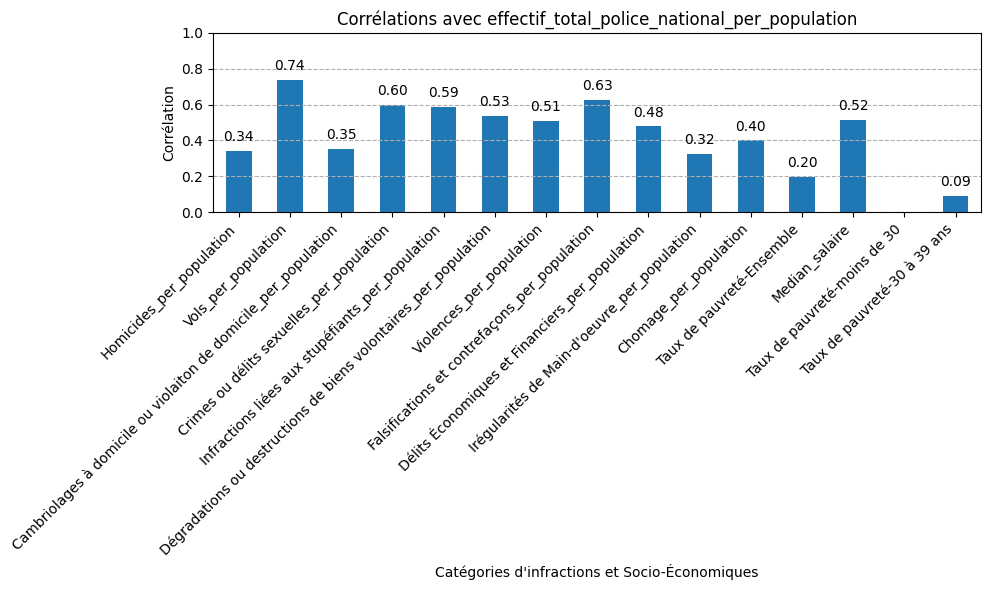

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Cette case de code produit un histogramme des corréralations entre d'un côté les différentes catégories d'infractions et 
# socio-économiques, et de l'autre côté le taux d'effectif de police

y_lim = (0, 1)  # Assure que l'échelle des corrélations va de 0 à 1
fig, ax = plt.subplots(figsize=(10, 6))
df_correlation['Corrélation avec effectif_total_police_national_per_population'].plot.bar(ax=ax)
ax.set_title('Corrélations avec effectif_total_police_national_per_population')
ax.set_ylabel('Corrélation')
ax.set_xlabel("Catégories d'infractions et Socio-Économiques")
ax.set_ylim(y_lim)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.grid(axis='y', linestyle='--')

# Ajouter des étiquettes sur chaque barre
for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}", (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.show()


> On observe une forte corrélation entre le taux d'effectifs de police et le taux de vols, le taux d'infractions liées aux stupéfiants, le taux liées aux crimes ou délits sexuels, le taux de falsification et contrefaçons.

Maintenant, on veut observer pour chaque catégorie d'infraction les corrélations avec les catégories socio-économiques.

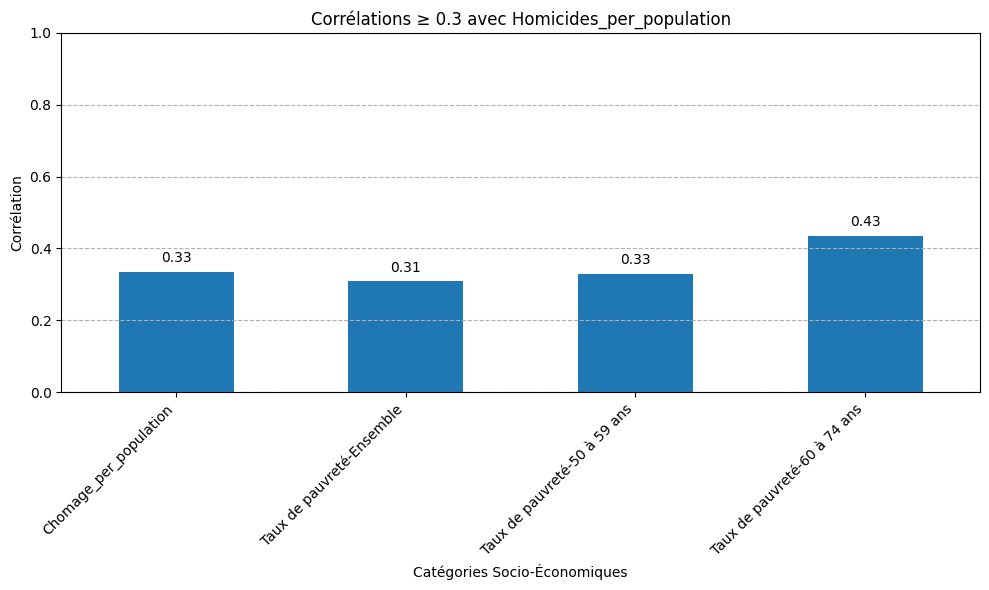

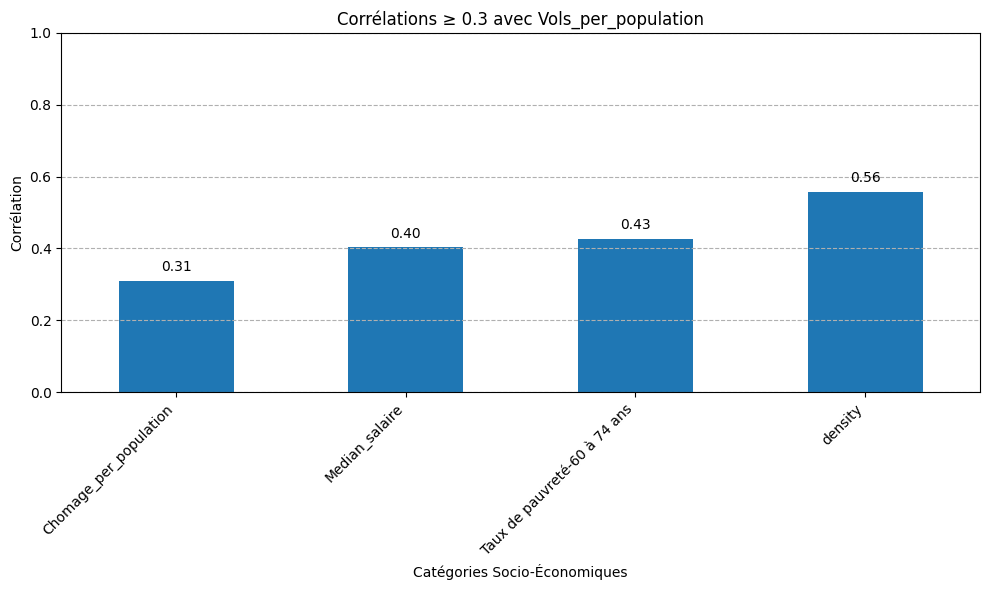

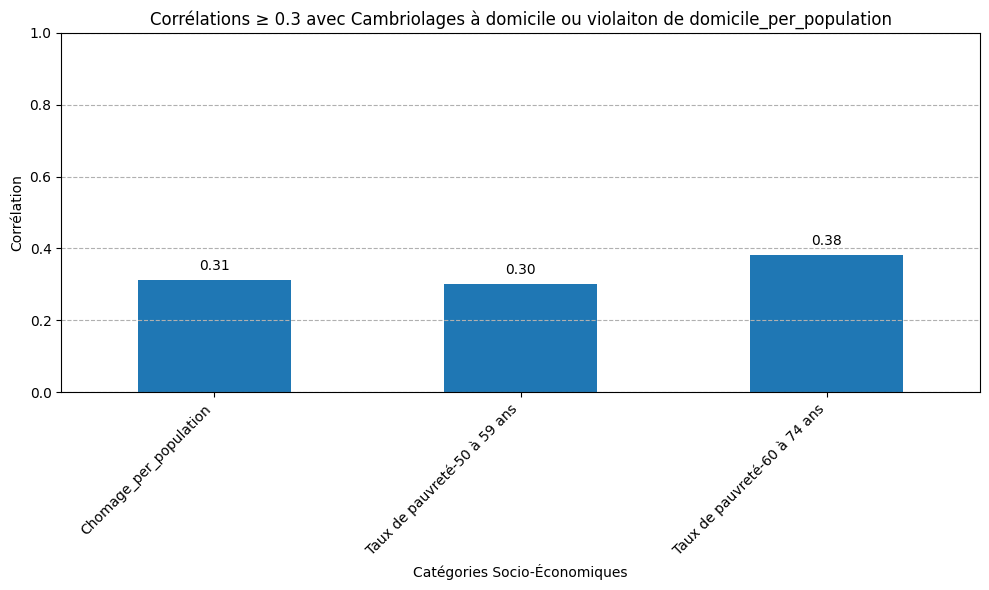

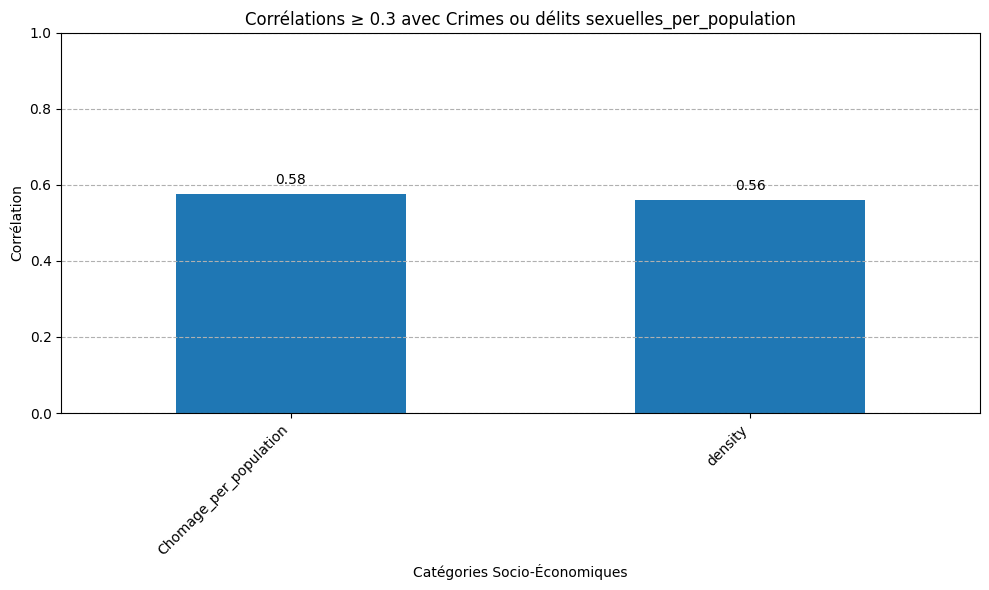

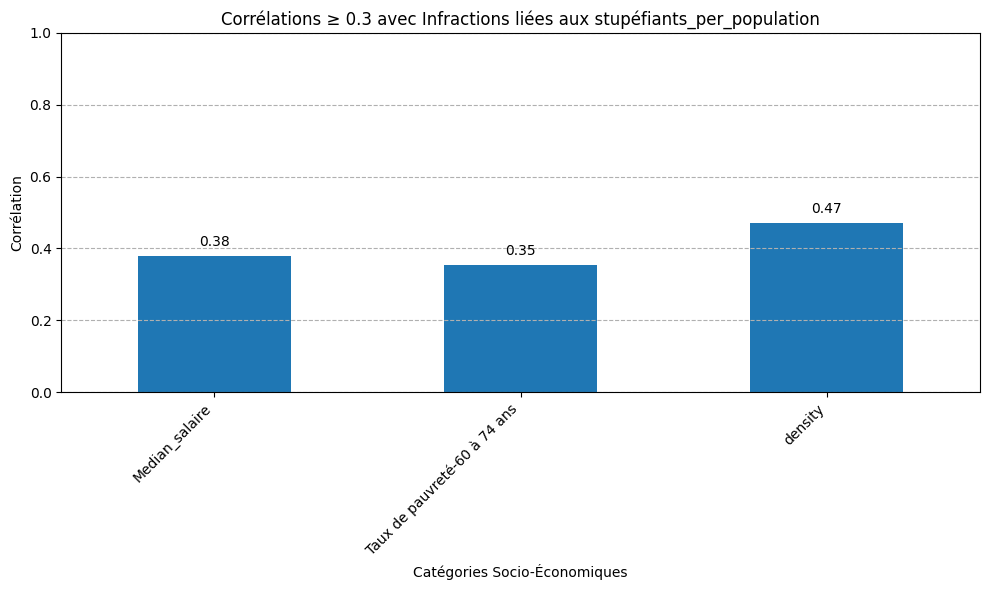

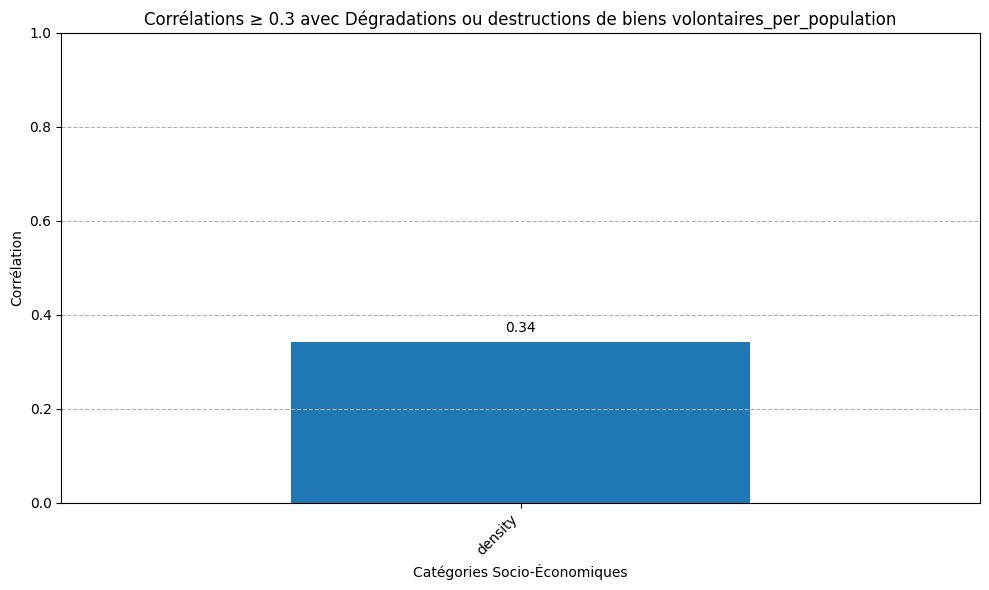

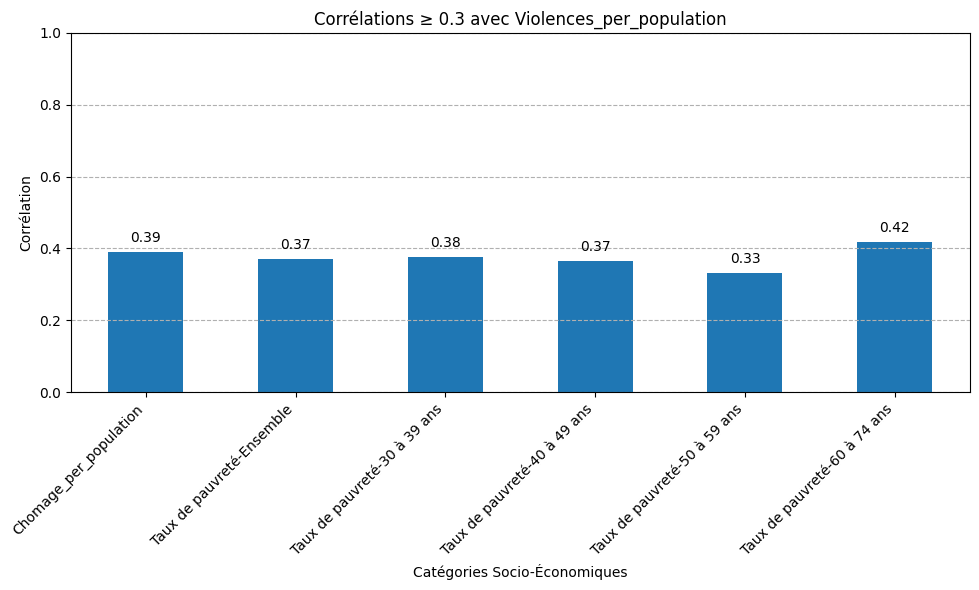

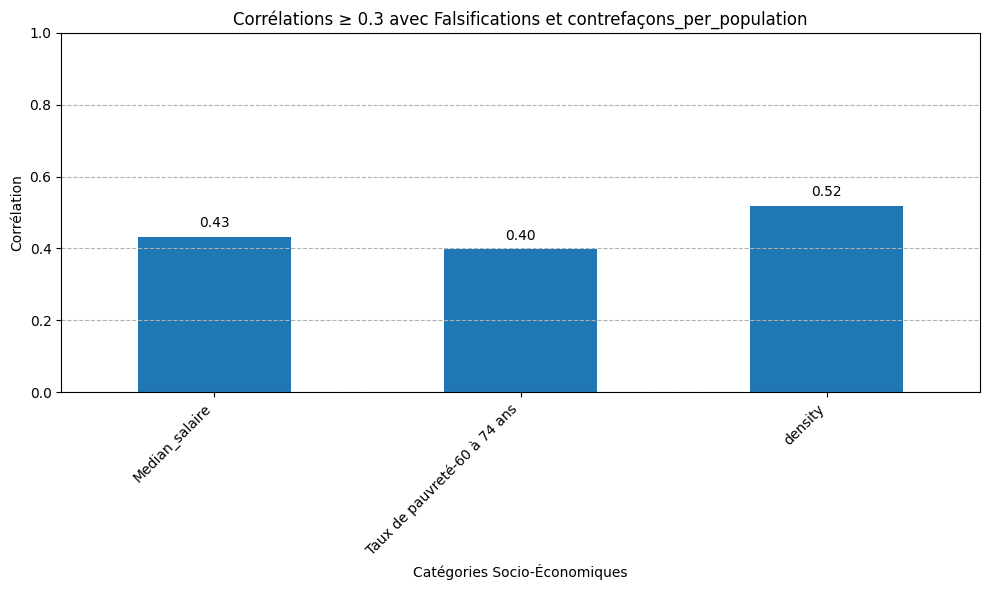

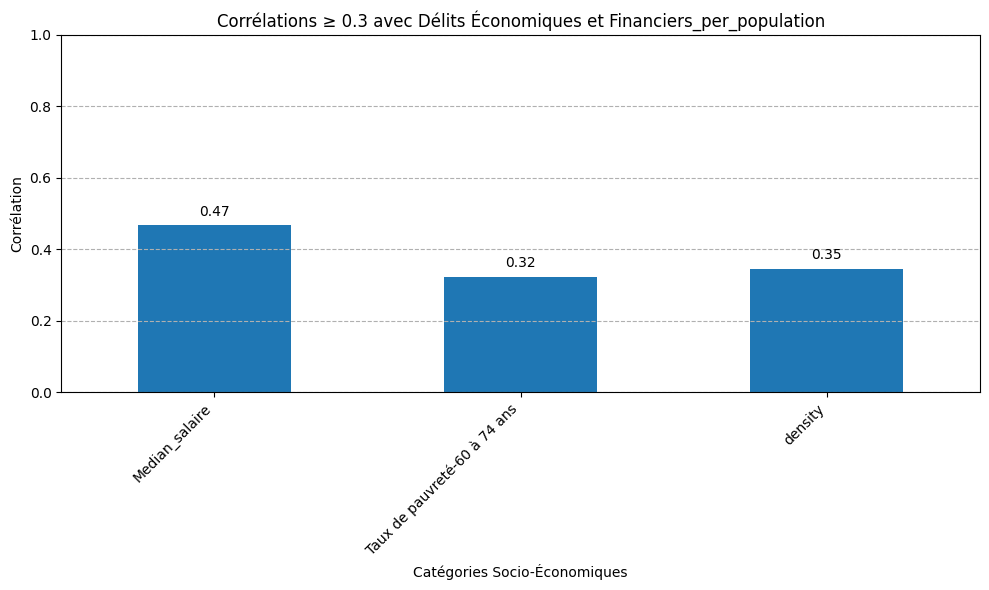

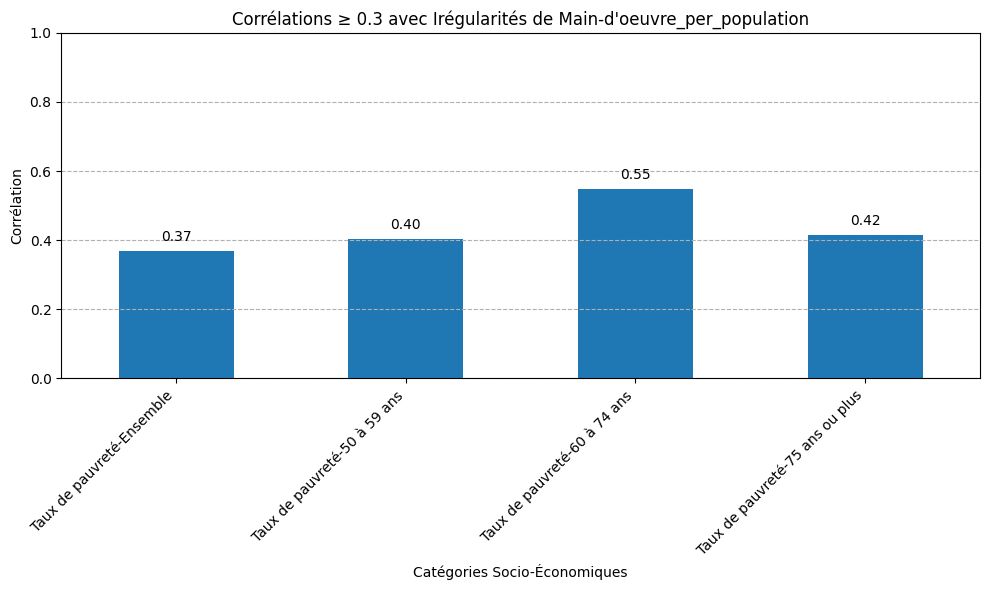

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Cette case va produire pour chaque catégorie d'infraction un histogramme de corrélations avec les catégories socios-économiqes, où sont affichés seulement les corrélations supérieures ou égales à 0,3.

categories_infractions = ['Homicides_per_population',
       'Vols_per_population',
       'Cambriolages à domicile ou violaiton de domicile_per_population',
       'Crimes ou délits sexuelles_per_population',
       'Infractions liées aux stupéfiants_per_population',
       'Dégradations ou destructions de biens volontaires_per_population',
       'Violences_per_population',
       'Falsifications et contrefaçons_per_population',
       'Délits Économiques et Financiers_per_population',
       "Irégularités de Main-d'oeuvre_per_population"]


categories_socio_ecos = ['Chomage_per_population',
        'Taux de pauvreté-Ensemble',
        'Median_salaire',
        'Taux de pauvreté-moins de 30',
        'Taux de pauvreté-30 à 39 ans',
        'Taux de pauvreté-40 à 49 ans', 
        'Taux de pauvreté-50 à 59 ans',
        'Taux de pauvreté-60 à 74 ans',
        'Taux de pauvreté-75 ans ou plus',
         'density']


y_lim = (0, 1)  # Assure que l'échelle des corrélations va de 0 à 1

for cat_infra in categories_infractions:
    correlations = []
    for categorie in categories_socio_ecos:
        # Calculer la corrélation pour chaque catégorie
        df = data_2012[['Date', 'code_dep', categorie, cat_infra]].copy()
        df = df.groupby('code_dep').mean().reset_index()
        df.drop('Date', axis=1, inplace=True)
        
        correlation = df[categorie].corr(df[cat_infra])
        if correlation >= 0.3:
            correlations.append((categorie, correlation))
    
    # S'il y a des corrélations significatives, afficher le graphique
    if correlations:
        df_correlation_significant = pd.DataFrame(correlations, columns=['Catégorie', 'Corrélation'])
        df_correlation_significant.set_index('Catégorie', inplace=True)
        
        # Tracé du graphique en barre
        fig, ax = plt.subplots(figsize=(10, 6))
        df_correlation_significant['Corrélation'].plot.bar(ax=ax)
        ax.set_title(f'Corrélations ≥ 0.3 avec {cat_infra}')
        ax.set_ylabel('Corrélation')
        ax.set_xlabel('Catégories Socio-Économiques')
        ax.set_ylim(y_lim)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
        ax.grid(axis='y', linestyle='--')

        # Ajoute des étiquettes sur chaque barre
        for p in ax.patches:
            ax.annotate(f"{p.get_height():.2f}", (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha='center', va='center', xytext=(0, 10), textcoords='offset points')
        
        plt.tight_layout()
        plt.show()



> On observe en général une corrélation significative des catégories d'infractions avec le taux de pauvreté 60 à 74 ans, et dans une moindre mesure avec le taux de chômage et le taux de pauvreté global. Le salaire médian est corrélé aux catégories Délits Économiques et Financiers_per_population et Falsifications, contrefaçons_per_population et Infractions liées aux stupéfiants_per_population.

On cherche maintenant à voir si ces corrélations sont semblables ou si elles diffèrent significativement d'une année à l'autre. La case suivante fait la même chose que la case précédente, les seules différences sont que cette fois ya toutes les années de 2012 à 2016, et non pas juste 2012, et que cette fois on affiche toutes les corrélations et pas juste celles supérieures à 0,3. Une ligne rouge est tracée pour observer ce seuil de 0,3.

C:\Users\thiba\AppData\Local\Temp\ipykernel_83680\945658668.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['code_dep'] = data_filtered['code_dep'].astype(str)
C:\Users\thiba\AppData\Local\Temp\ipykernel_83680\945658668.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['Date'] = pd.to_datetime(data_filtered['Date'])


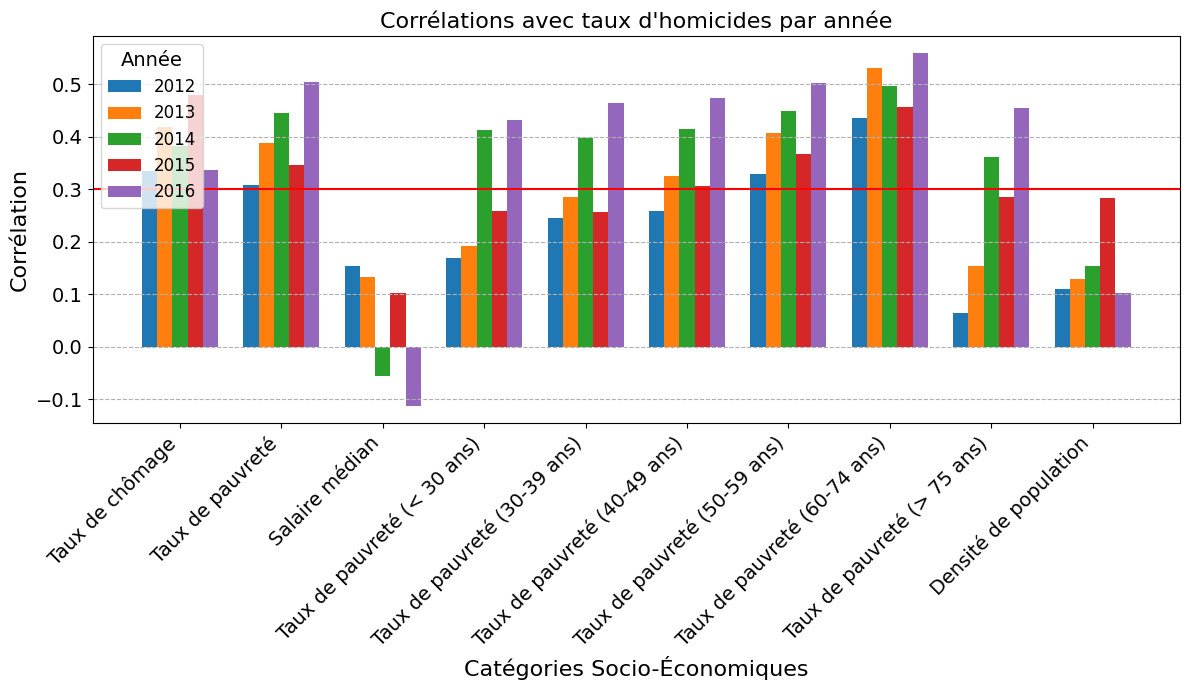

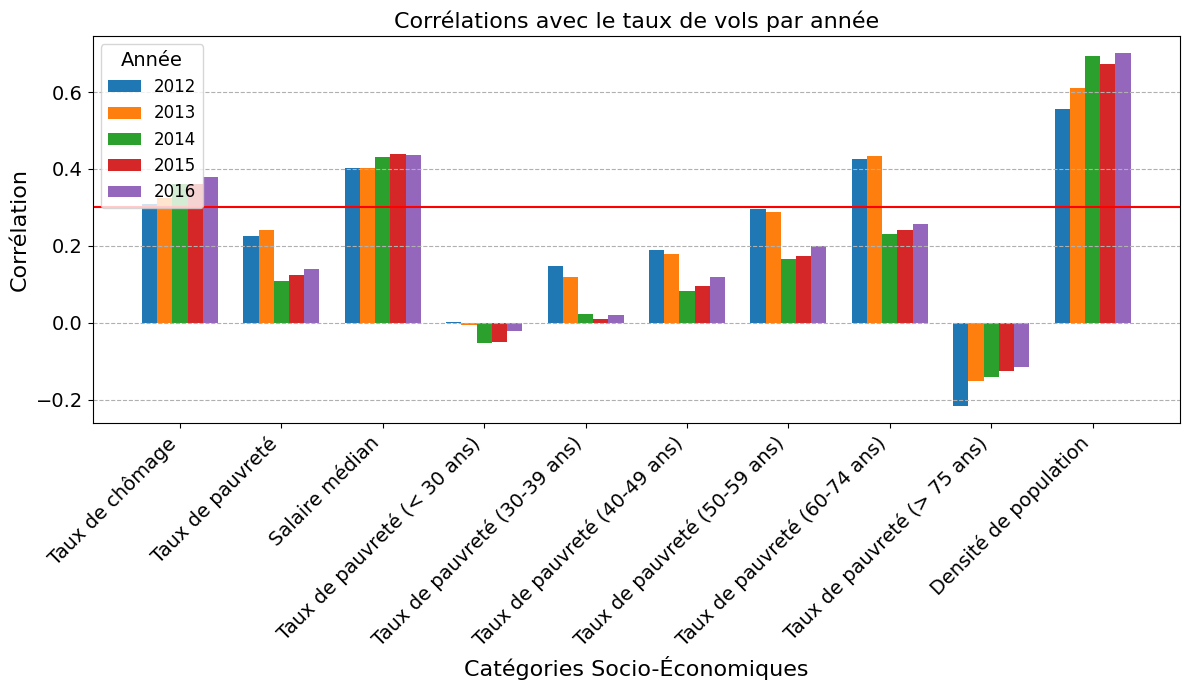

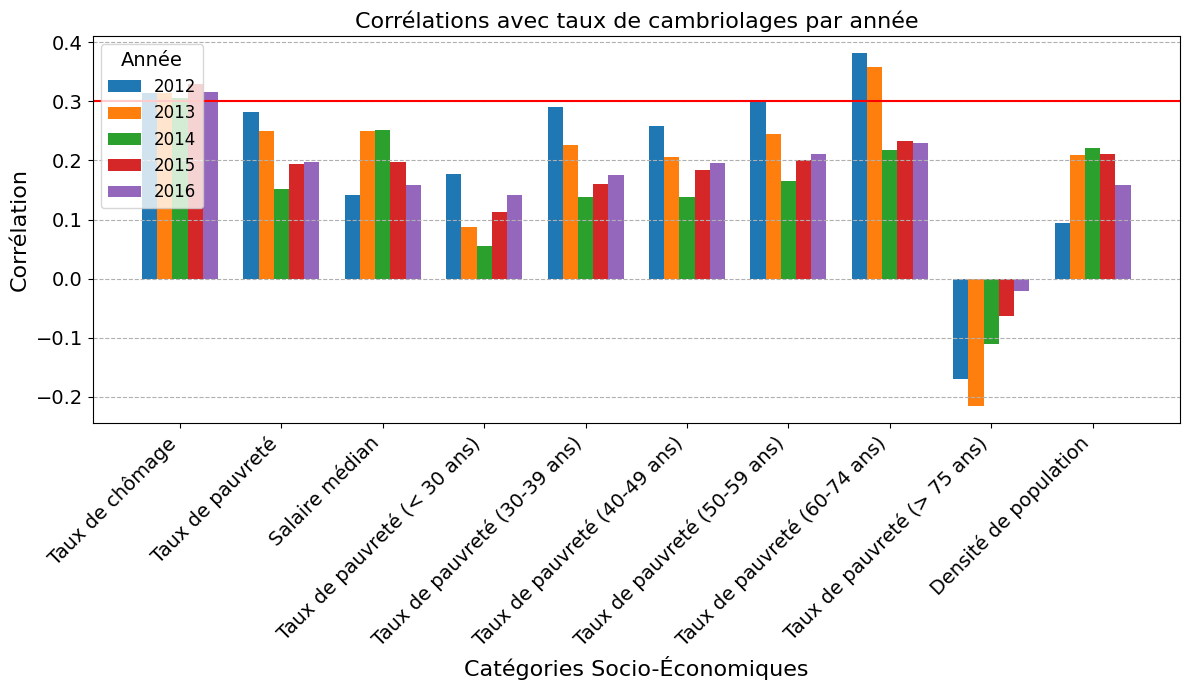

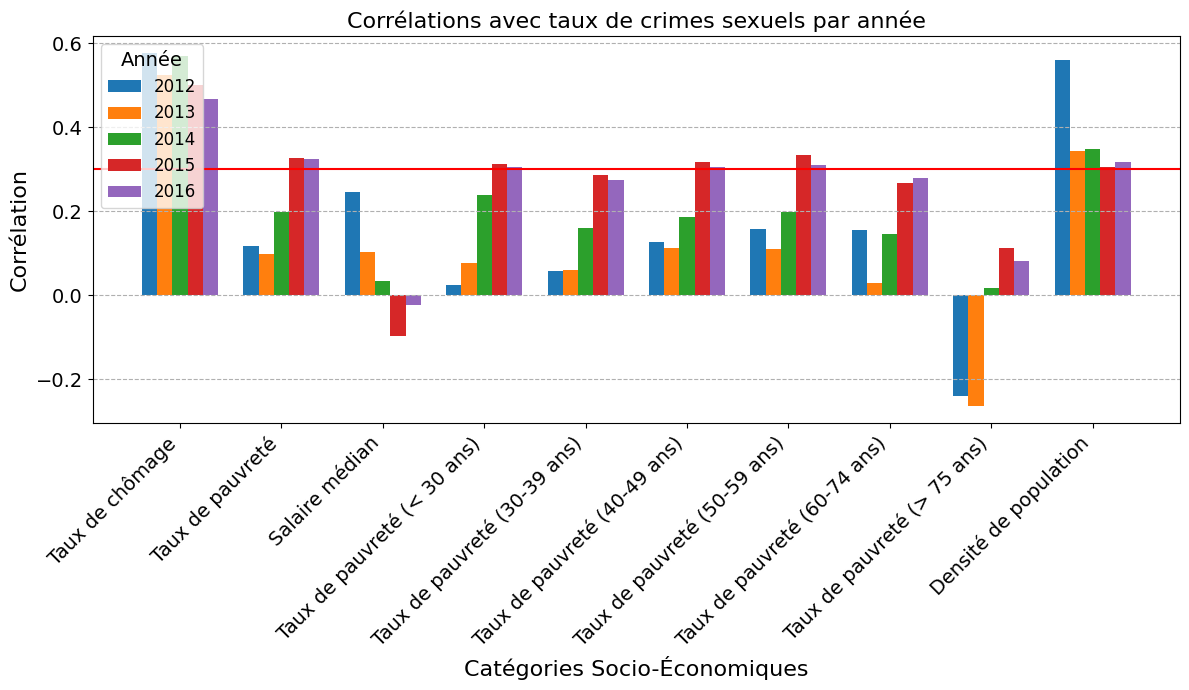

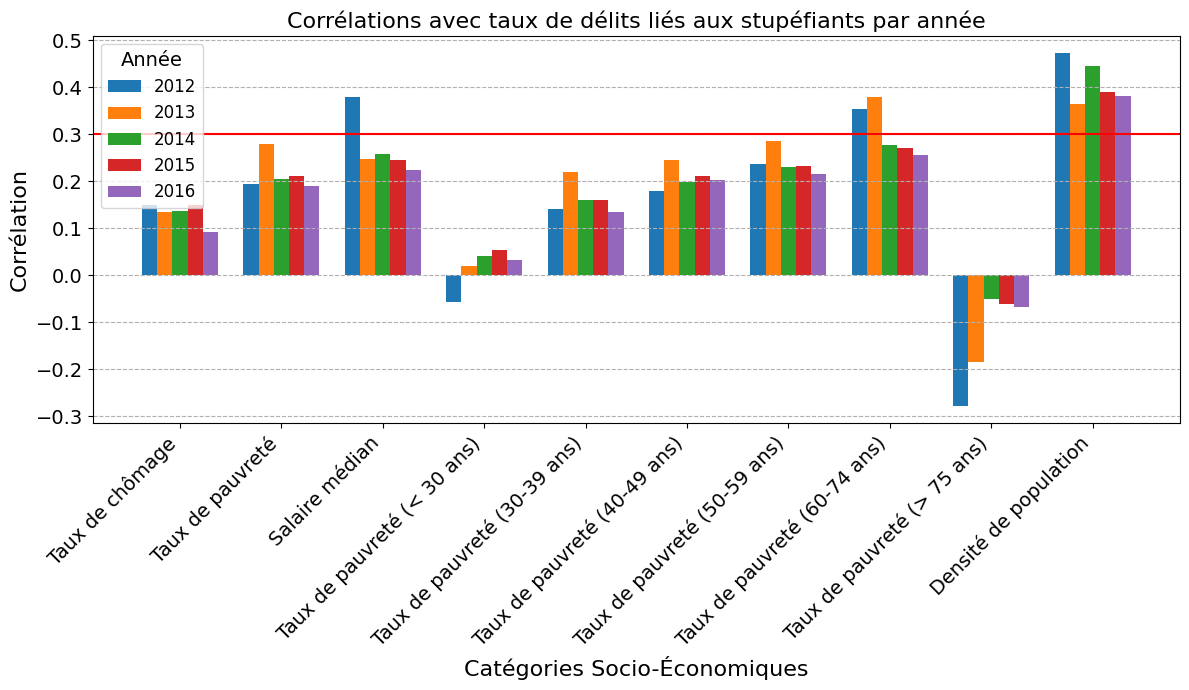

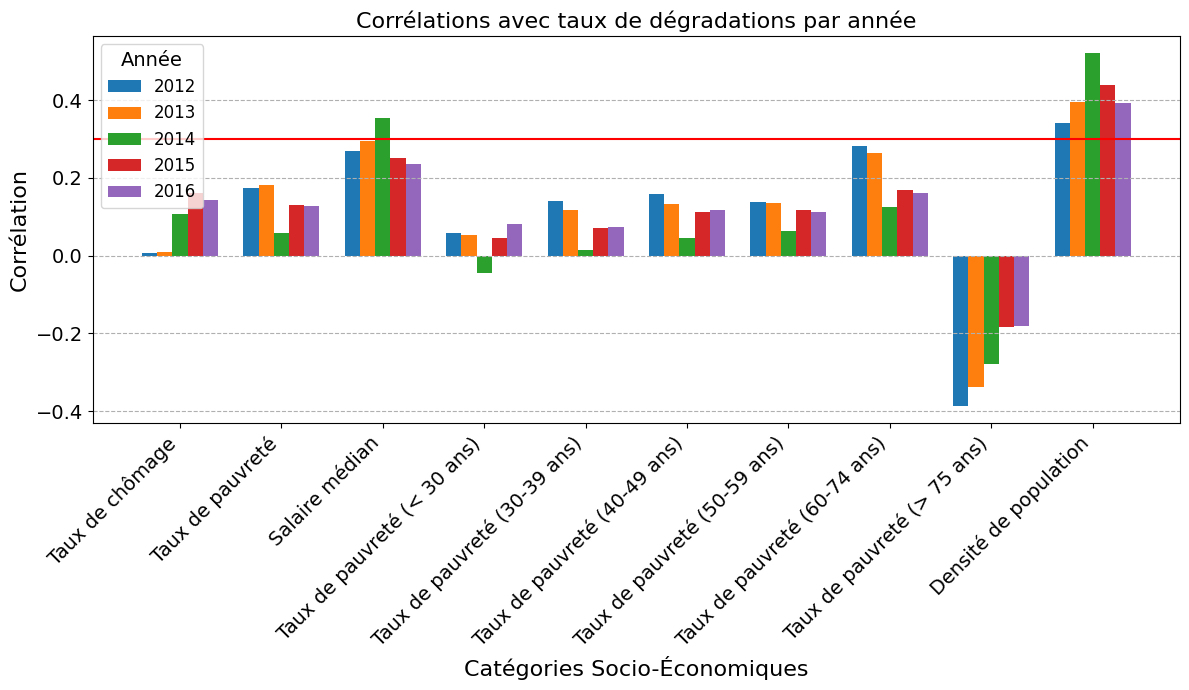

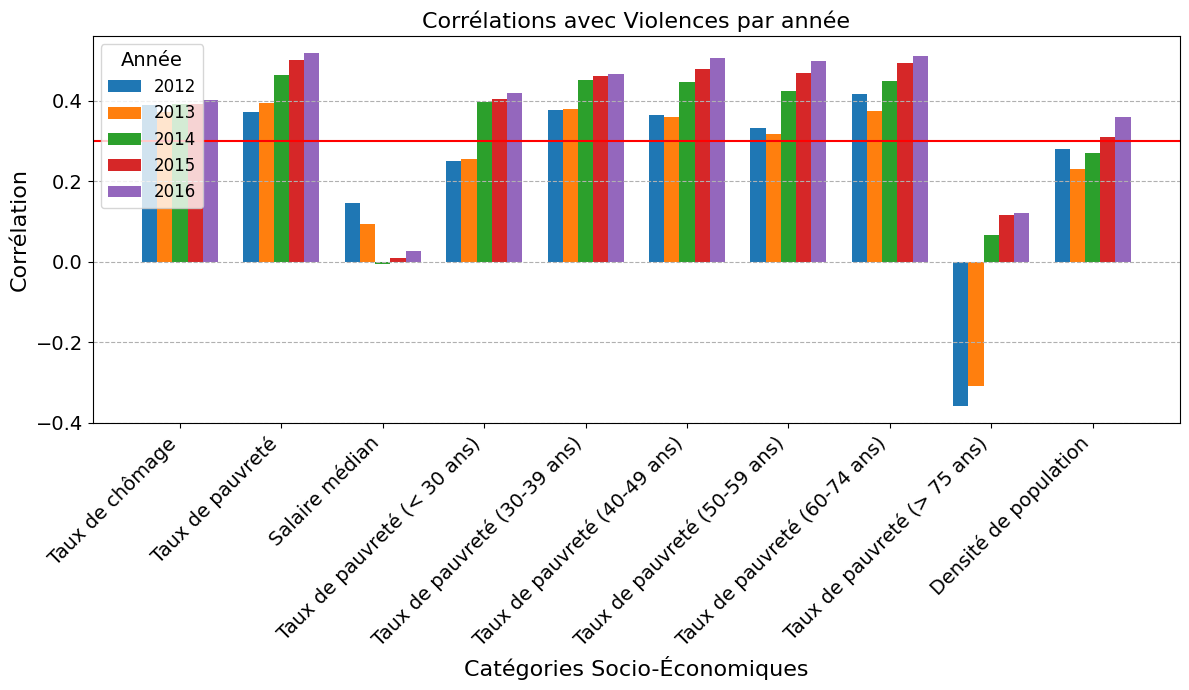

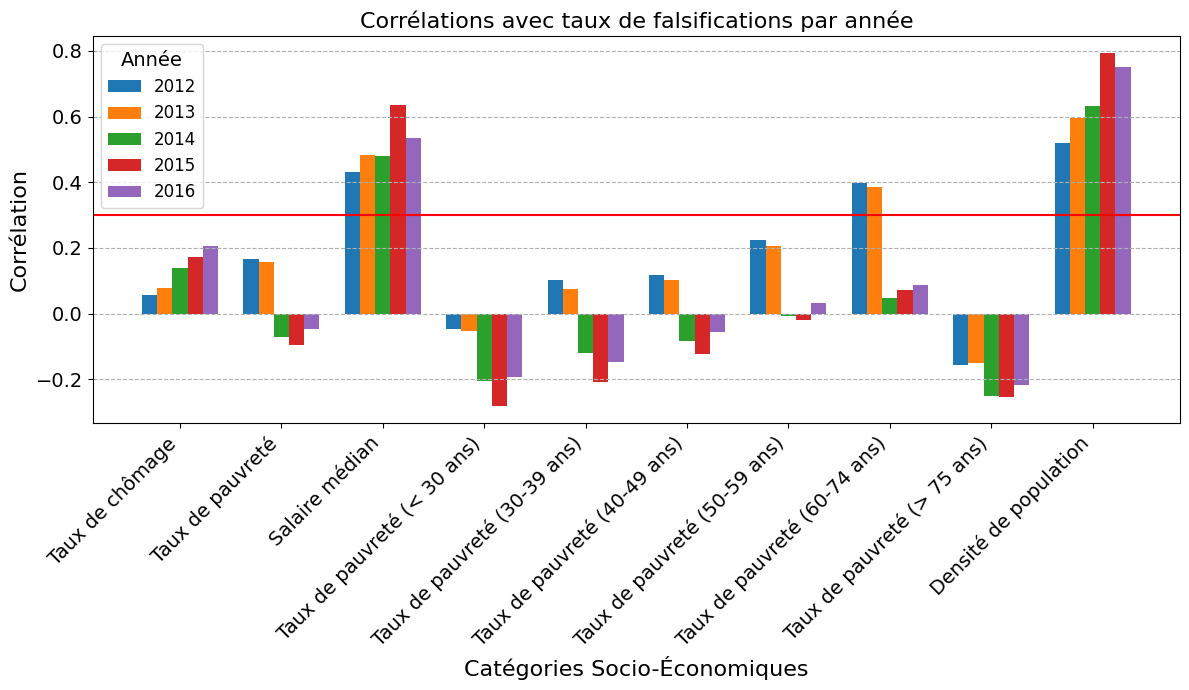

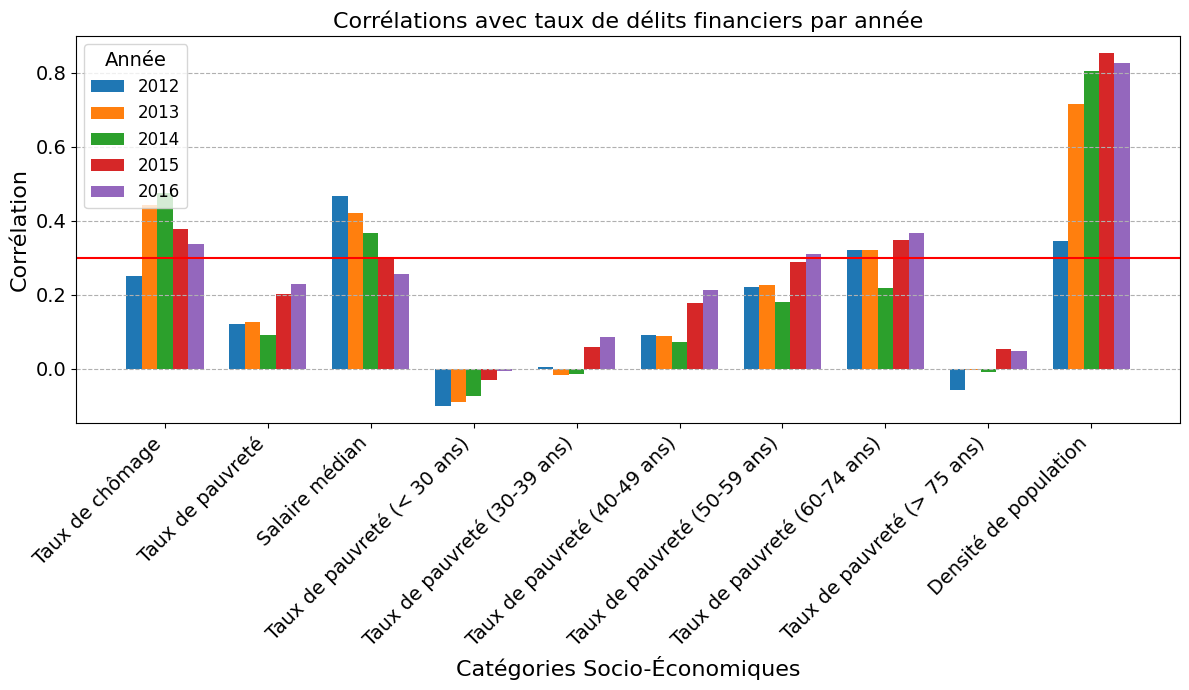

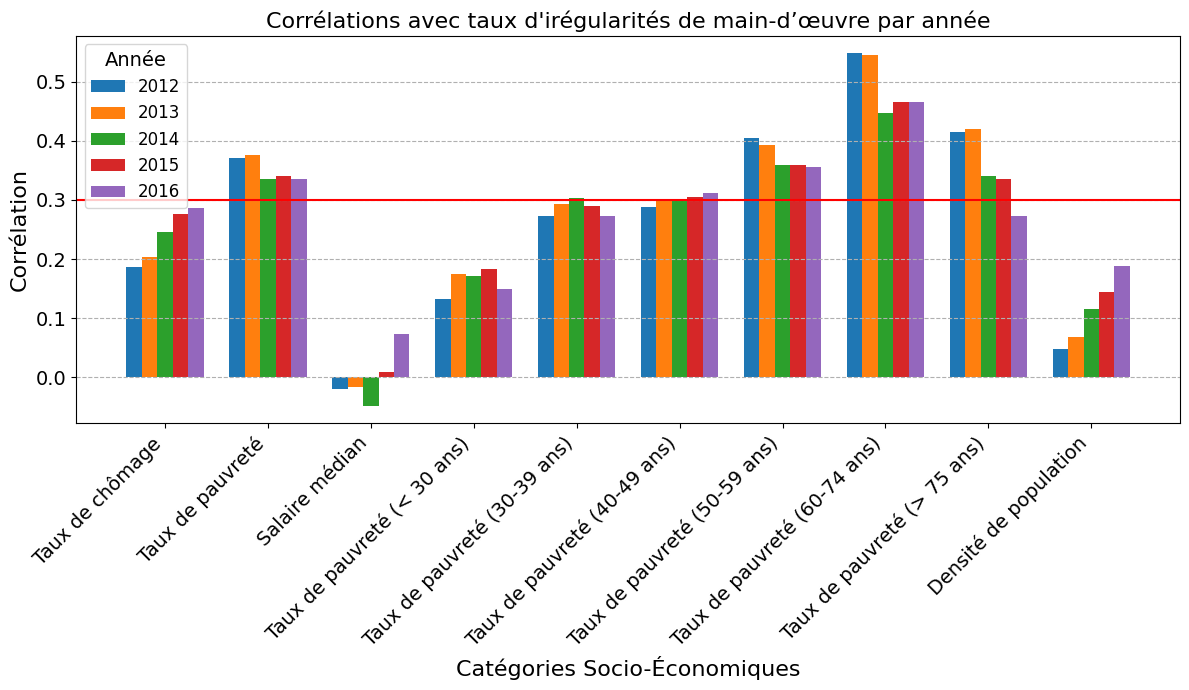

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Filtrer les données pour les années 2012 à 2016 et exclure les valeurs pour 'France_Métro'
data_filtered = data[(data['annee'].isin([2012, 2013, 2014, 2015, 2016])) & (data['code_dep'] != 'France_Métro')]

# Conversion des types de données
data_filtered['code_dep'] = data_filtered['code_dep'].astype(str)
data_filtered['Date'] = pd.to_datetime(data_filtered['Date'])

# Préparation pour tracer les graphiques
years = [2012, 2013, 2014, 2015, 2016]
colors = plt.cm.viridis(np.linspace(0, 1, len(years)))  # Générer une palette de couleurs

categories_infractions = ['Homicides_per_population',
       'Vols_per_population',
       'Cambriolages à domicile ou violaiton de domicile_per_population',
       'Crimes ou délits sexuelles_per_population',
       'Infractions liées aux stupéfiants_per_population',
       'Dégradations ou destructions de biens volontaires_per_population',
       'Violences_per_population',
       'Falsifications et contrefaçons_per_population',
       'Délits Économiques et Financiers_per_population',
       "Irégularités de Main-d'oeuvre_per_population"]


categories_socio_ecos = ['Chomage_per_population',
        'Taux de pauvreté-Ensemble',
        'Median_salaire',
        'Taux de pauvreté-moins de 30',
        'Taux de pauvreté-30 à 39 ans',
        'Taux de pauvreté-40 à 49 ans', 
        'Taux de pauvreté-50 à 59 ans',
        'Taux de pauvreté-60 à 74 ans',
        'Taux de pauvreté-75 ans ou plus',
         'density']

# Définir une largeur de barre et un décalage
bar_width = 0.15
year_offsets = np.arange(-2, 3) * bar_width  # Créer un décalage pour 5 années

for cat_infra in categories_infractions:
    plt.figure(figsize=(12, 7))
    bars_positions = np.arange(len(categories_socio_ecos))  # Positions initiales des barres
    
    for year_offset, year in zip(year_offsets, years):
        correlations = []
        data_year = data_filtered[data_filtered['annee'] == year]
        
        for categorie in categories_socio_ecos:
            df = data_year[['Date', 'code_dep', categorie, cat_infra]].copy()
            df = df.groupby('code_dep').mean().reset_index()
            df.drop('Date', axis=1, inplace=True)
            
            correlation = df[categorie].corr(df[cat_infra])
            #if correlation >= 0.3:
            correlations.append(correlation)
            #else:
                #correlations.append(np.nan)  # Utiliser NaN pour les corrélations < 0.3
 
        # Créer un masque pour filtrer les NaN et éviter de tracer ces barres
        mask = ~np.isnan(correlations)
        positions = bars_positions[mask] + year_offset
        plt.bar(positions, np.array(correlations)[mask], width=bar_width, label=f"{year}")
    
    
        # Dictionnaire de correspondance entre noms originaux et étiquettes d'affichage
    labels_map = {
        'Chomage_per_population': 'Taux de chômage',
        'Taux de pauvreté-Ensemble': 'Taux de pauvreté',
        'Median_salaire': 'Salaire médian',
        'Taux de pauvreté-moins de 30': 'Taux de pauvreté (< 30 ans)',
        'Taux de pauvreté-30 à 39 ans': 'Taux de pauvreté (30-39 ans)',
        'Taux de pauvreté-40 à 49 ans': 'Taux de pauvreté (40-49 ans)',
        'Taux de pauvreté-50 à 59 ans': 'Taux de pauvreté (50-59 ans)',
        'Taux de pauvreté-60 à 74 ans': 'Taux de pauvreté (60-74 ans)',
        'Taux de pauvreté-75 ans ou plus': 'Taux de pauvreté (> 75 ans)',
        'density': 'Densité de population'
    }
    infractions_labels_map = {
    'Homicides_per_population': "taux d'homicides",
    'Vols_per_population': 'le taux de vols',
    'Cambriolages à domicile ou violaiton de domicile_per_population': 'taux de cambriolages',
    'Crimes ou délits sexuelles_per_population': 'taux de crimes sexuels',
    'Infractions liées aux stupéfiants_per_population': 'taux de délits liés aux stupéfiants',
    'Dégradations ou destructions de biens volontaires_per_population': 'taux de dégradations',
    'Violences_per_population': 'Violences',
    'Falsifications et contrefaçons_per_population': 'taux de falsifications',
    'Délits Économiques et Financiers_per_population': 'taux de délits financiers',
    "Irégularités de Main-d'oeuvre_per_population": "taux d'irégularités de main-d’œuvre"
    }

    plt.xticks(bars_positions, [labels_map[cat] for cat in categories_socio_ecos], rotation=45, ha='right', fontsize=14)  # Taille des étiquettes des axes x
    plt.yticks(fontsize=14)  # Taille des étiquettes des axes y
    plt.ylabel('Corrélation', fontsize=16)  # Taille de l'étiquette de l'axe y
    plt.xlabel('Catégories Socio-Économiques', fontsize=16)  # Taille de l'étiquette de l'axe x
    plt.title(f'Corrélations avec {infractions_labels_map[cat_infra]} par année', fontsize=16)  # Taille du titre
    plt.legend(title="Année", fontsize=12, title_fontsize=14, loc='upper left')  # Taille de la légende et du titre de la légende
    plt.grid(axis='y', linestyle='--')
    plt.axhline(y=0.3, color='r', linestyle='-')
    plt.tight_layout()
    plt.show()

On constate que globalement, à quelques exceptions près, les corrélations ne varient pas beaucoup entre les différentes années.